In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Read the dataset 

In [2]:
df = pd.read_csv(r'Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# shape of data 
df.shape

(7043, 21)

- #### This dataset contain 7043 records(rows) and 21 attributes(columns)

In [5]:
# data types of the columns 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
## See the uniuqe values of each columns 
for col in df.columns  :
    unique_value = df[col].unique()
    print(f'\nColumn **{col}** contain unique values :\n{unique_value}')


Column **customerID** contain unique values :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column **gender** contain unique values :
['Female' 'Male']

Column **SeniorCitizen** contain unique values :
[0 1]

Column **Partner** contain unique values :
['Yes' 'No']

Column **Dependents** contain unique values :
['No' 'Yes']

Column **tenure** contain unique values :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column **PhoneService** contain unique values :
['No' 'Yes']

Column **MultipleLines** contain unique values :
['No phone service' 'No' 'Yes']

Column **InternetService** contain unique values :
['DSL' 'Fiber optic' 'No']

Column **OnlineSecurity** contain unique values :
['No' 'Yes' 'No internet service']

Column **OnlineBackup** contain unique values :
['Yes' 'N

### Conclusion 
   - ####  From above we can see that `SeniorCitizen` and `TotalCharges` have mismatch data type. We need to convert it proper data type
   - ####  The `SeniorCitizen` column currently has a data type of int64, but since it contains only two categorical values `(0 and 1)`, it should be converted to a categorical or object type to better reflect its nature as a binary categorical variable.
   - ####  The `TotalCharges`  column currently has data type object but it contain numerical values so convert it into the int of float 

### 2. Data Type Convertion

- #### Convert `SeniorCitizen` from `int64` to `category`  or `object`

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['SeniorCitizen'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

- #### Convert `TotalCharges` from `object` to `float64`

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].dtypes

dtype('float64')

- #### Check if the above operation reflect or not 

In [9]:
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

- #### We can see that the `data type` of the `SeniorCitizen` `(int64 to category)` and `TotalCharges` `(object to float64)` are change 

- #### Convert the all object column to category it may be memory efficient 

In [10]:
categorical_columns = df.select_dtypes(include='object').columns

In [11]:
for cat_col in categorical_columns:
   df[cat_col] = df[cat_col].astype('category')

In [12]:
df.dtypes

customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

#### Insights 
  - #### We can see that all of the `object` data type are converted into `category`
  - #### Now we have  18 `categorical columns` and  3 `Numerical columns`
  - #### Traget column is a `categorical` columns which is `Churn`

### 3. Drop Unneccesary columns

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- #### I find that the customerID is not much required to predict whether the customer is churn or not so i decide to drop this columns 
- #### drop customerID column

In [14]:
df.drop(columns=['customerID'], axis = 1, inplace = True)

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- #### We can see that `customerID` is `drop(remove)` successfully

### 4. Create a new feature from existing feature / Feature Selection

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- #### We have an column called `tenure` : Which describe the number of month a `customer` `stay` with the company 
- #### I want to create a new column called `tenure_range` which show the `tenure` in range  

In [17]:
df['tenure'].max()

np.int64(72)

In [18]:
df['tenure'].min()

np.int64(0)

#### Strategy
- ####  The tenure column has a maximum value of 72, so we will:
- #### Create bins ranging from 0 to 72 (in months)
- #### Assign labels corresponding to 13 yearly intervals (e.g., Year 1, Year 2, ..., Year 13)

In [19]:
bins = [0, 12, 24, 36, 48, 60, 73]
label = ['0-12','13-24', '25-36', '37-48', '49-60', '61-72']

df['tenure_range'] = pd.cut(df['tenure'], bins = bins, labels = label, right = False )

In [20]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12


- #### We create a new column tenure_range 
- #### So we don't need the tenure drop this 

In [21]:
df.drop(columns=['tenure'], axis = 1, inplace = True)

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_range'],
      dtype='object')

In [23]:
len(df.columns)

20

### 5. Null value Imputation

#### 5.1 Check null values

In [24]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_range         0
dtype: int64

In [25]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_range         0
dtype: int64

- #### We can see the only `TotalCharges` columns contain null value
- #### Null value count in `TotalCharges` is 11 which not much we can avoid it but fill it 

#### 5.2 Fill the null value (for numerical feature use mean/median and for categorical feature use mode)

In [26]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isna().sum()

np.int64(0)

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_range        0
dtype: int64

- #### Now we can see that there is no null value in the data set after filling the null values 

### 6. See the distribution of the categorical variable 


- #### Below function is used to plot the distribution of the categorical feature with the target feature 
- #### Our Target feature id `Chunk` 

In [28]:
def categorical_distribution_plot(df, x, hue='Churn'):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=x, hue=hue, palette='coolwarm', edgecolor='black')
    plt.title(f'Distribution of {x} with {hue}')
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

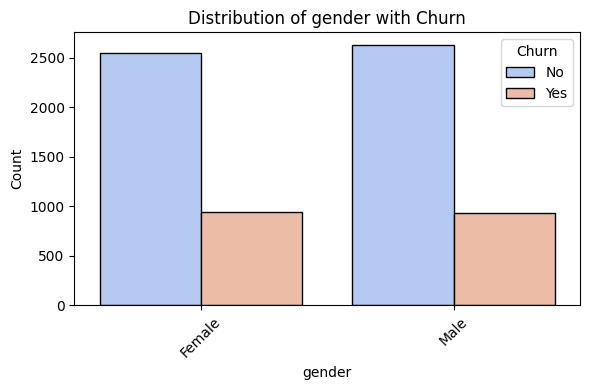

In [29]:
categorical_distribution_plot(df, 'gender')

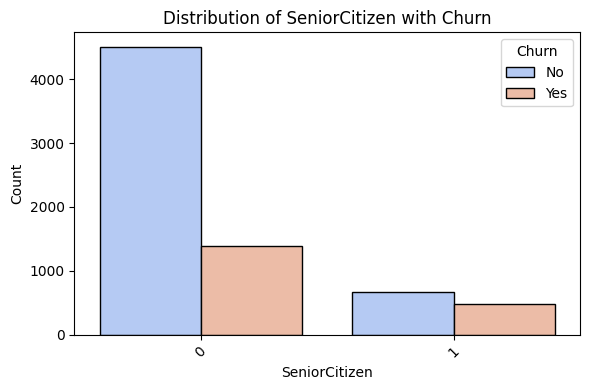

In [30]:
categorical_distribution_plot(df, 'SeniorCitizen')

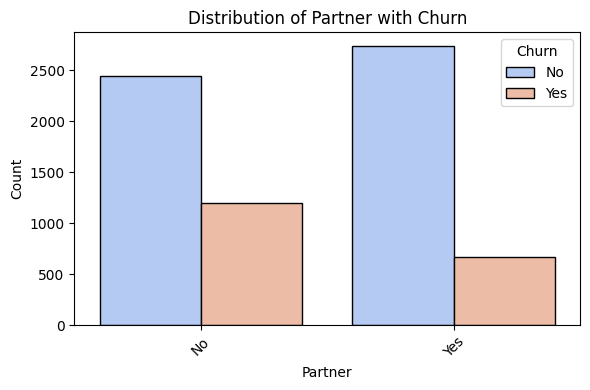

In [31]:
categorical_distribution_plot(df,'Partner')

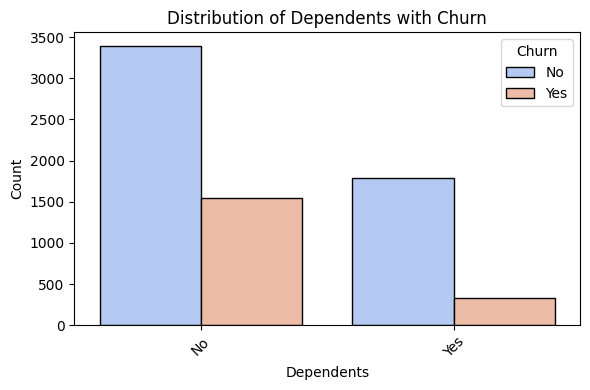

In [32]:
categorical_distribution_plot(df,'Dependents')

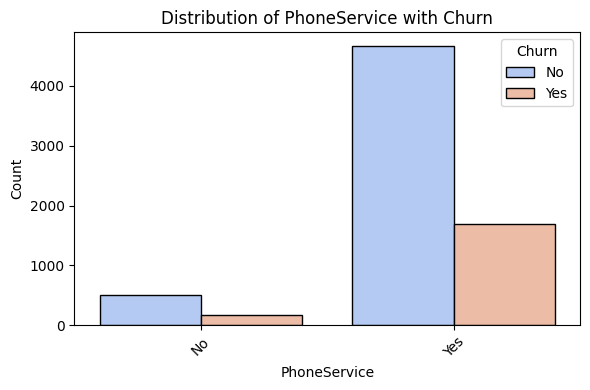

In [33]:
categorical_distribution_plot(df,'PhoneService')

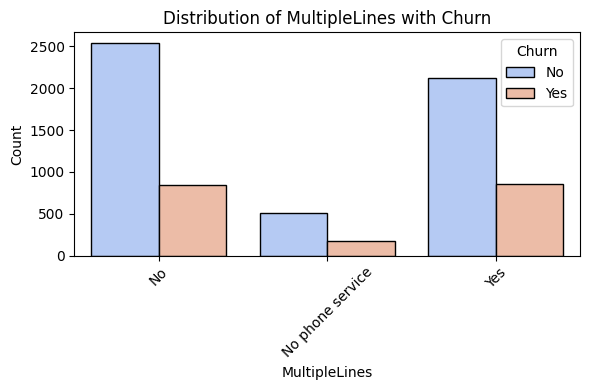

In [34]:
categorical_distribution_plot(df,'MultipleLines')

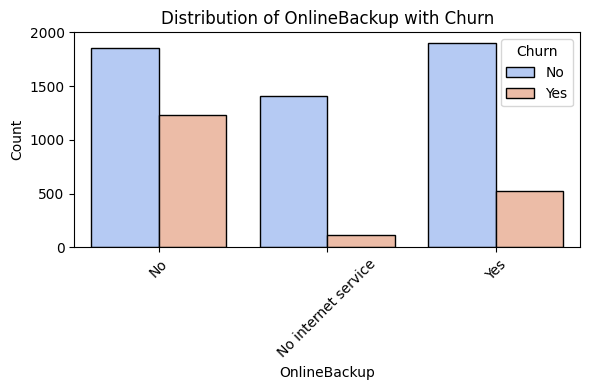

In [35]:
categorical_distribution_plot(df,'OnlineBackup')

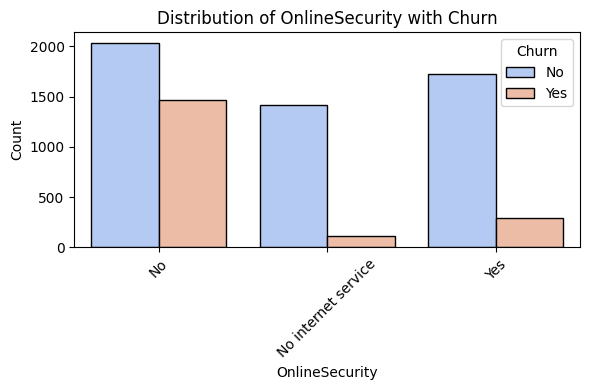

In [36]:
categorical_distribution_plot(df,'OnlineSecurity')

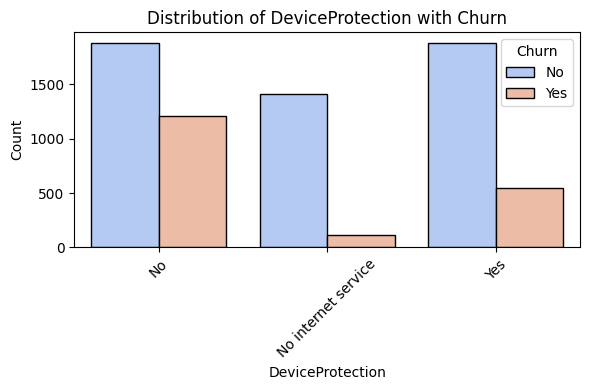

In [37]:
categorical_distribution_plot(df,'DeviceProtection')

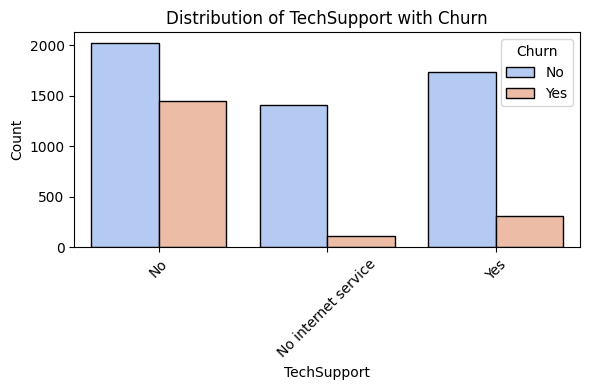

In [38]:
categorical_distribution_plot(df,'TechSupport')

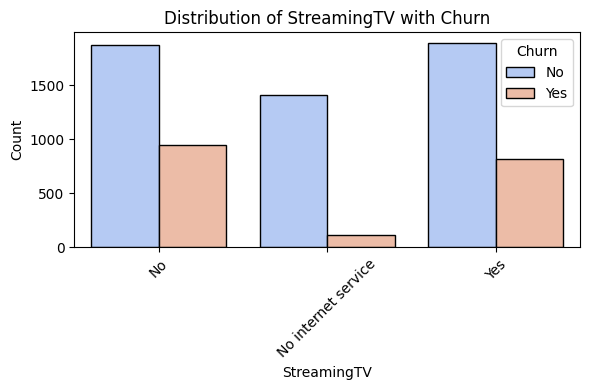

In [39]:
categorical_distribution_plot(df,'StreamingTV')


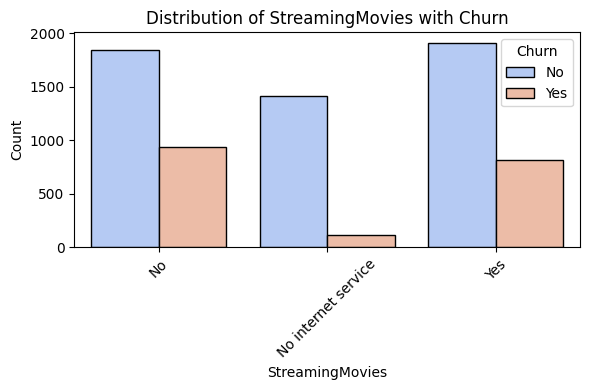

In [40]:
categorical_distribution_plot(df, 'StreamingMovies')

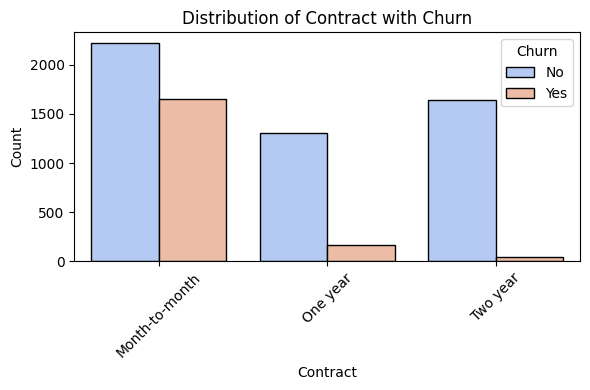

In [41]:
categorical_distribution_plot(df, 'Contract')

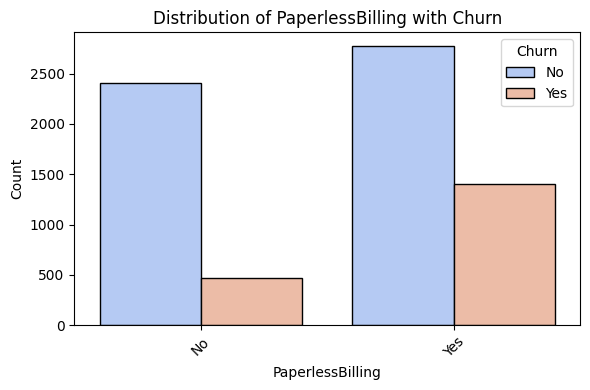

In [42]:
categorical_distribution_plot(df, 'PaperlessBilling')


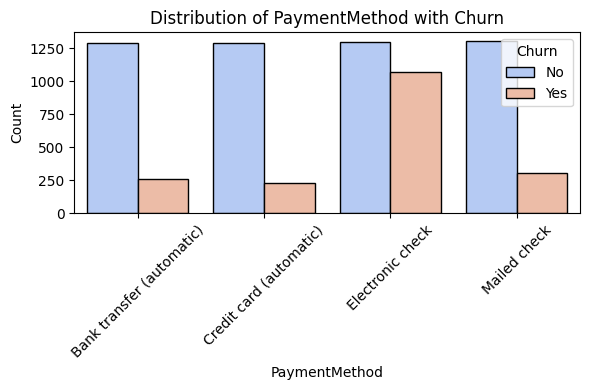

In [43]:
categorical_distribution_plot(df, 'PaymentMethod')

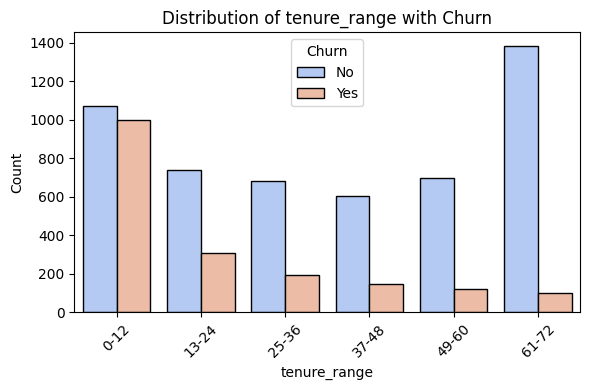

In [44]:
categorical_distribution_plot(df, 'tenure_range')


### 6. Convert the Target Varible to the Binary (Yes = 1, No = 0)


In [45]:
df['Churn'] = np.where((df['Churn'] == 'Yes'), 1, 0)
df['Churn'].unique()

array([0, 1])

In [46]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
6932,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),56.75,503.25,0,0-12
815,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.60,2088.05,0,25-36
2648,Male,0,No,No,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,59.60,2094.90,0,25-36
2833,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),61.15,4017.45,0,61-72
2969,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.30,7337.55,0,61-72
349,Female,1,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,No,Bank transfer (automatic),97.00,6430.90,0,61-72
3163,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,90.70,3413.25,0,37-48
3206,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,109.20,0,0-12
6529,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.85,156.40,1,0-12
5957,Male,1,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,1,13-24


### 7. Apply Encoding (LabelEncoding/ OheHotEncoding/ OrdinalEncoding)

In [47]:
# apply encoding on all of the categorical variable 
cat_col = df.select_dtypes(include='category').columns

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()

In [50]:
df[cat_col] = df[cat_col].apply(encoder.fit_transform)

In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


In [52]:
for i, label in enumerate(encoder.classes_):
    print(f"{label} → {i}")

0-12 → 0
13-24 → 1
25-36 → 2
37-48 → 3
49-60 → 4
61-72 → 5


In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


### 8. Find the outlier

<Axes: >

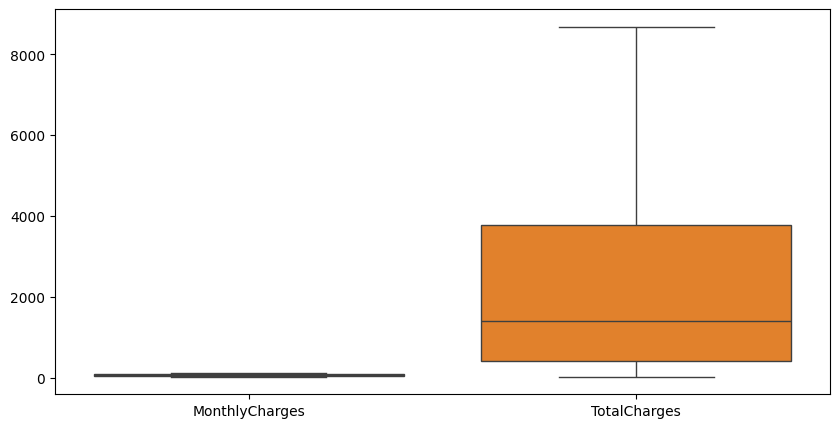

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df[['MonthlyCharges','TotalCharges']])

#### Insight 
- #### We can see that there is no outliers in the `TotalCharges` and ``MonthlyCharges`

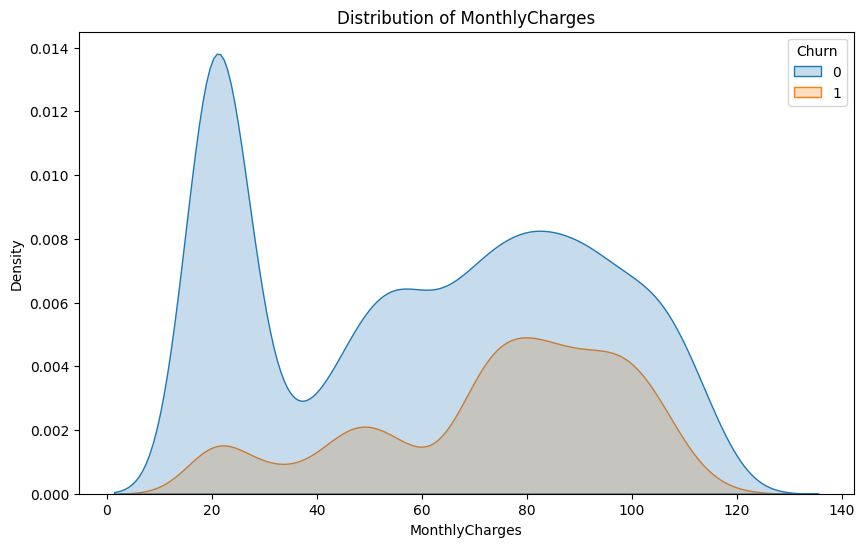

In [55]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = df, x = 'MonthlyCharges',hue='Churn',fill=True)
plt.title('Distribution of MonthlyCharges')
plt.show()

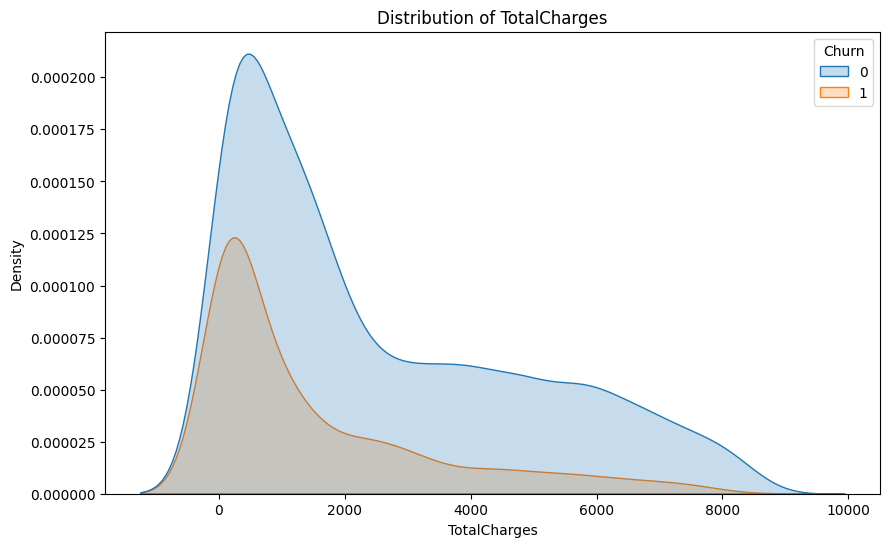

In [56]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = df, x = 'TotalCharges',hue='Churn',fill=True)
plt.title('Distribution of TotalCharges')
plt.show()

C:\Users\vrush\AppData\Local\Temp\ipykernel_4384\3772838997.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
C:\Users\vrush\AppData\Local\Temp\ipykernel_4384\3772838997.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

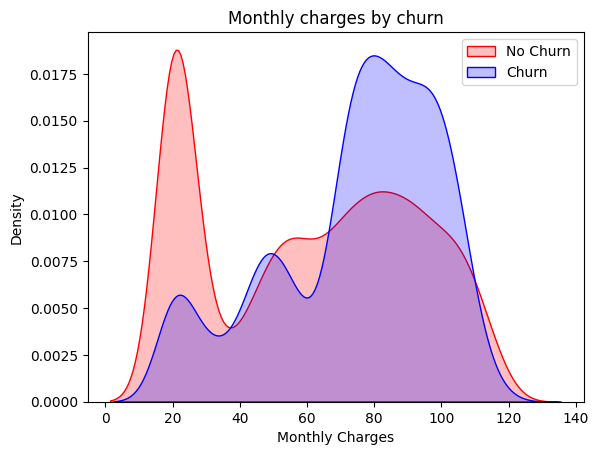

In [57]:
# kernel density estimate (KDE) plot.
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#### Insight 
- #### We can see that Churn is high when monthly charges are high

C:\Users\vrush\AppData\Local\Temp\ipykernel_4384\1035477783.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
C:\Users\vrush\AppData\Local\Temp\ipykernel_4384\1035477783.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],


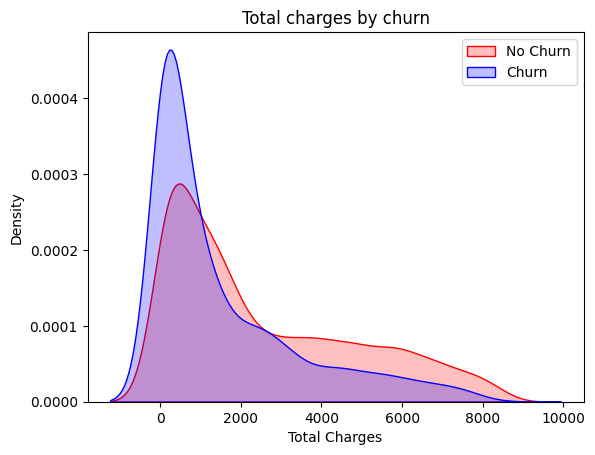

In [58]:
# kernel density estimate (KDE) plot.
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')
plt.show()

### 8. Find the correlation 

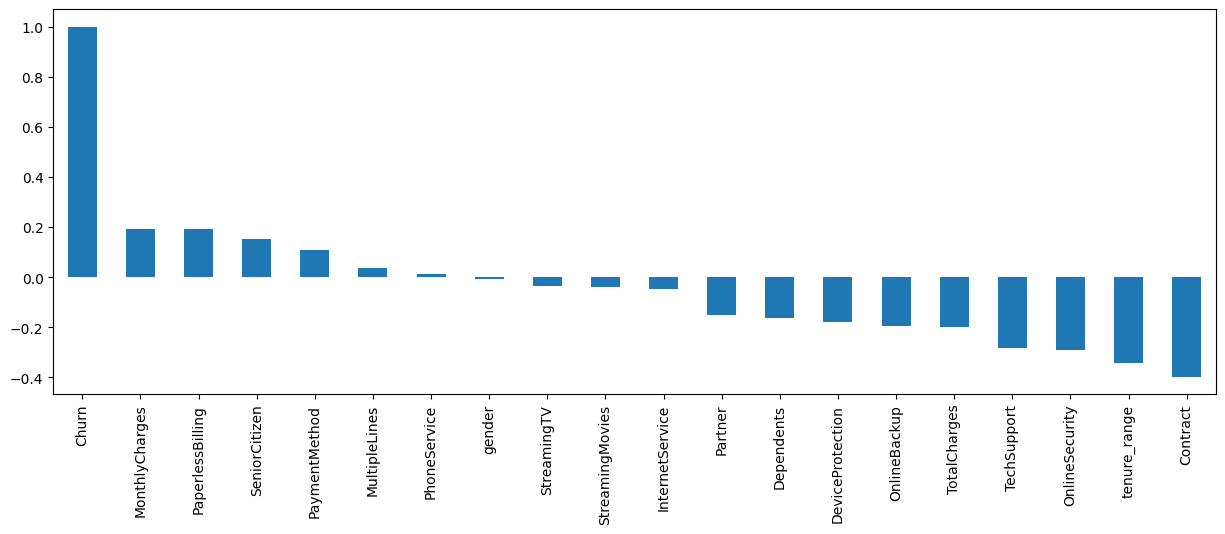

In [59]:
plt.figure(figsize=(15,5))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

#### *Insight:*

- #### `HIGH Churn` seen in case of `Month to month contracts`, `No online security`, `No Tech support`, `First year of subscription` and `Fibre Optics Internet``

- #### `LOW Churn` is seens in case of `Long term contracts`, Subscriptions without internet service and The customers engaged for 5+ years

- #### Factors like `Gender`, `Availability` of `PhoneService` and # of multiple lines have alomost NO impact on Churn

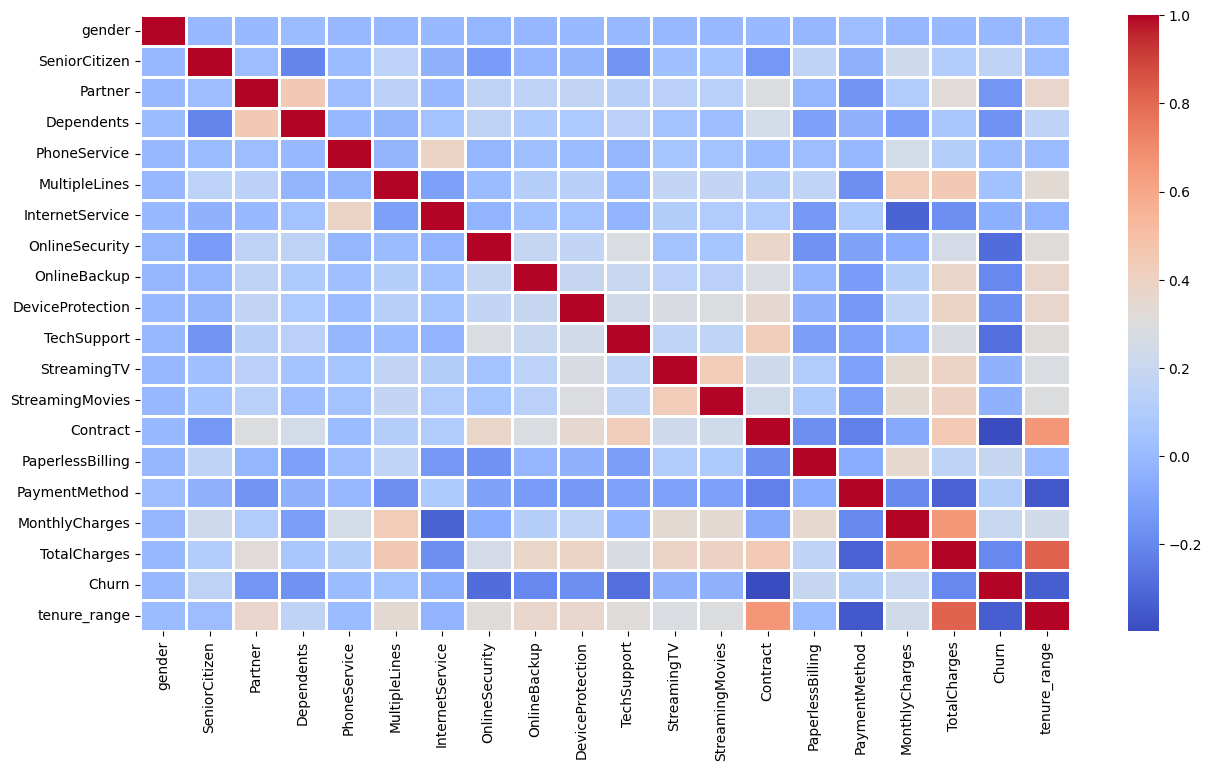

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=False, linewidth=2, cmap='coolwarm')
plt.show()

In [61]:
churn_1 = df[df['Churn'] == 1]
churn_0 = df[df['Churn'] == 0]


In [62]:
churn_1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0
5,0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1,0
8,0,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1,2
13,1,0,0,0,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,1,1
7026,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1,0
7032,1,1,0,0,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,1,0
7034,0,0,0,0,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,1,5


### 8. Seperate the Input Feature(Independent feature) and target feature (Dependent feature)

In [63]:
X = df.drop('Churn', axis = 1)

In [64]:
y = df['Churn']

In [65]:
X.shape

(7043, 19)

In [66]:
y.shape

(7043,)

### 9. Split the Data Into Training and Testing 

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [69]:
# Shape of the Training set and Testing Set 
print('Shape of the Training Set')
print('\nX_train shape :',X_train.shape)
print('y_train shape :', y_train.shape)

print('\nShape of Testing set')
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

Shape of the Training Set

X_train shape : (5634, 19)
y_train shape : (5634,)

Shape of Testing set
X_test shape : (1409, 19)
y_test shape : (1409,)


In [70]:
print('training : \n',y_train.value_counts())
print('\nTesting : \n',y_test.value_counts())

training : 
 Churn
0    4133
1    1501
Name: count, dtype: int64

Testing : 
 Churn
0    1041
1     368
Name: count, dtype: int64


- #### We can see that our data is imbalance 

### 10. Fit the data into the Model 

- #### We used a different Classification model and compare there performance and then choose a appropriate model 

#### 1. Decision Tree (DecisionTreeClassifier())

In [71]:
from sklearn.tree import DecisionTreeClassifier

# object of decisiontree
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=8, random_state = 0)

tree.fit(X_train, y_train)
# prediction
y_pred_tree = tree.predict(X_test)

In [72]:
print(y_pred_tree)

[0 0 0 ... 0 0 1]


In [73]:
## Accuracy score of the Decision tree 
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred_tree)
print('Model accuracy :',accuracy)

Model accuracy : 0.7806955287437899


In [74]:
# classification report of the model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_tree)
print('Classification Report for Tree: \n', report)

Classification Report for Tree: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1041
           1       0.58      0.60      0.59       368

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [75]:
# cumfusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree)
print('Confusion matrix for tree :\n', cm)


print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])


Confusion matrix for tree :
 [[878 163]
 [146 222]]

True Positive (TP) : 222
True Negative (TN) : 878

False Positive (FP) : 163
False Negative (FN): 146


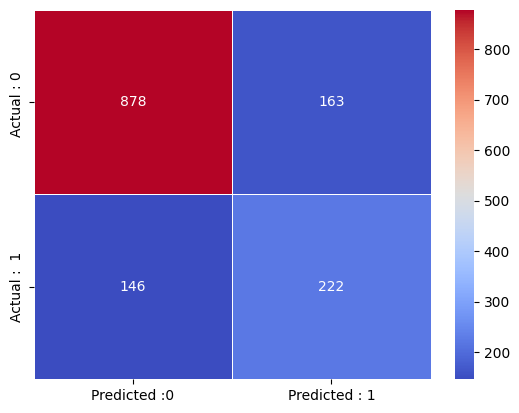

In [76]:
df_cm = pd.DataFrame(cm)
df_cm.columns = ['Predicted :0','Predicted : 1']
df_cm.index = ['Actual : 0 ','Actual :  1']
sns.heatmap(df_cm, annot = True,fmt='d', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.show()

#### 2. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [78]:
# accuracy of the model 
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy :', accuracy)

Model accuracy : 0.7920511000709723


In [79]:
# classification report 
report = classification_report(y_test, y_pred)
print('Classification report for LR :\n',report)

Classification report for LR :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.51      0.56       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [80]:
# cumfusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix :\n', cm)


print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])


Confusion matrix :
 [[928 113]
 [180 188]]

True Positive (TP) : 188
True Negative (TN) : 928

False Positive (FP) : 113
False Negative (FN): 180


In [81]:
df_cm = pd.DataFrame(cm)
df_cm.columns = ['Predicted :0','Predicted : 1']
df_cm.index = ['Actual : 0 ','Actual :  1']

In [82]:
df_cm

,Predicted :0,Predicted : 1
Actual : 0,928,113
Actual : 1,180,188


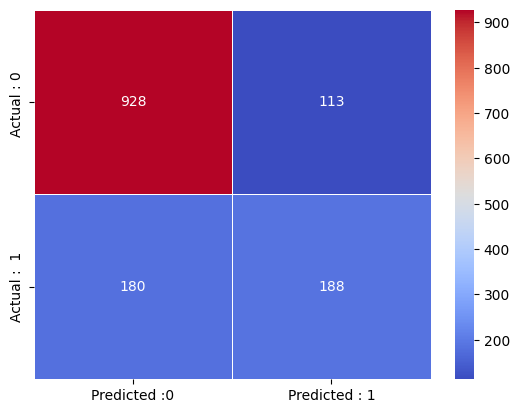

In [83]:
sns.heatmap(df_cm, annot = True,fmt='d', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.show()

- #### As we know that our Churn is imbalance make it balance
- #### Use SMOTE(Synthetic Minority Oversampling Technique)

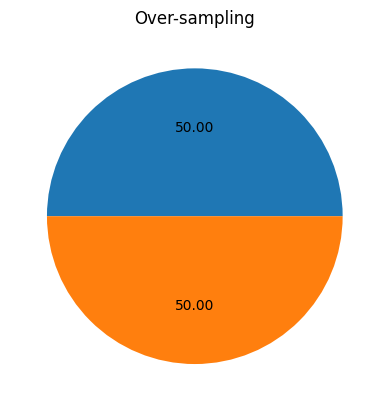

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_ovs, y_ovs = smote.fit_resample(X,y)

fig, oversp = plt.subplots()
oversp.pie( y_ovs.value_counts(),autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()


## Split these balance data into training and testing  again

In [85]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_ovs, y_ovs, test_size = 0.20, random_state = 0)

In [86]:
# shape of the Balanced data test and train data 
print('Shape of the training data :')
print(f'X_train_b shape : {X_train_b.shape}')
print(f'y_train_b shape : {y_train_b.shape}')

print('\nShape of testing data :')
print(f'X_test_b shape : {X_test_b.shape}')
print(f'y_test_b shape : {y_test_b.shape}')



Shape of the training data :
X_train_b shape : (8278, 19)
y_train_b shape : (8278,)

Shape of testing data :
X_test_b shape : (2070, 19)
y_test_b shape : (2070,)


## Fit this balance data into the different model and compare there accurancies 

## 1. Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_b, y_train_b)

y_pred_lr = lr.predict(X_test_b)
print(y_pred_lr)

[1 0 1 ... 1 0 1]


C:\Users\vrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
score = lr.score(X_test_b, y_test_b)
print('Linear Model Score : ',score)

Linear Model Score :  0.8038647342995169


In [89]:
score = lr.score(X_train_b, y_train_b)
score

0.8024885237980188

In [90]:
# classification report and confusion matrix and accuracncy 
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

accuracy = accuracy_score(y_test_b, y_pred_lr)
report = classification_report(y_test_b, y_pred_lr)
cm = confusion_matrix(y_test_b, y_pred_lr)

print(f'Accuracy : {accuracy}')
print(f'\nClassification report :\n {report}')
print(f'\nConfusion Matrix :\n {cm}')
print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])

Accuracy : 0.8038647342995169

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1033
           1       0.78      0.85      0.81      1037

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070


Confusion Matrix :
 [[787 246]
 [160 877]]

True Positive (TP) : 877
True Negative (TN) : 787

False Positive (FP) : 246
False Negative (FN): 160


## 2. Decision Tree 

In [91]:
from sklearn.tree import DecisionTreeClassifier

tc = DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, random_state = 100)

tc.fit(X_train_b, y_train_b)

y_pred_tc = tc.predict(X_test_b)
print(y_pred_tc)

[1 1 1 ... 1 0 1]


In [92]:
accuracy = accuracy_score(y_test_b, y_pred_tc)
report = classification_report(y_test_b, y_pred_tc)
cm = confusion_matrix(y_test_b, y_pred_tc)

print(f'Accuracy of Decision Tree : {accuracy}')
print(f'\nClassification Report of Decision Tree : \n{report}')
print(f'Confusion matrix for Decision Tree :\n {cm}')
print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])

Accuracy of Decision Tree : 0.808695652173913

Classification Report of Decision Tree : 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1033
           1       0.78      0.87      0.82      1037

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

Confusion matrix for Decision Tree :
 [[774 259]
 [137 900]]

True Positive (TP) : 900
True Negative (TN) : 774

False Positive (FP) : 259
False Negative (FN): 137


## 3. Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=8, max_depth=6, class_weight='balanced', random_state = 100)

rfc.fit(X_train_b, y_train_b)

y_pred_rfc = rfc.predict(X_test_b)
print(y_pred_rfc)

[1 0 1 ... 0 0 1]


In [94]:
accuracy = accuracy_score(y_test_b, y_pred_rfc)
report = classification_report(y_test_b, y_pred_rfc)
cm = confusion_matrix(y_test_b, y_pred_rfc)

print(f'Accuracy of Random Forest : {accuracy}')
print(f'\nClassification Report of Random Forest : \n{report}')
print(f'Confusion matrix for  Random Forest :\n {cm}')
print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])

Accuracy of Random Forest : 0.8096618357487922

Classification Report of Random Forest : 
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1033
           1       0.78      0.86      0.82      1037

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

Confusion matrix for  Random Forest :
 [[784 249]
 [145 892]]

True Positive (TP) : 892
True Negative (TN) : 784

False Positive (FP) : 249
False Negative (FN): 145


## 4. Adaboost

In [95]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100)

ab.fit(X_train_b, y_train_b)
y_pred_ab = ab.predict(X_test_b)
print(y_pred_ab)

[1 0 1 ... 0 0 1]


In [96]:
accuracy = accuracy_score(y_test_b, y_pred_ab)
report = classification_report(y_test_b, y_pred_ab)
cm = confusion_matrix(y_test_b, y_pred_ab)

print(f'Accuracy of Adaboost: {accuracy}')
print(f'\nClassification Report of Adaboost : \n{report}')
print(f'Confusion matrix for  Adaboost :\n {cm}')
print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])

Accuracy of Adaboost: 0.8202898550724638

Classification Report of Adaboost : 
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1033
           1       0.79      0.88      0.83      1037

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Confusion matrix for  Adaboost :
 [[787 246]
 [126 911]]

True Positive (TP) : 911
True Negative (TN) : 787

False Positive (FP) : 246
False Negative (FN): 126


## 5. GradientBoostingClassifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train_b, y_train_b)

y_pred_gb = gb.predict(X_test_b)
print(y_pred_gb)

[1 0 1 ... 0 0 1]


In [98]:
accuracy = accuracy_score(y_test_b, y_pred_gb)
report = classification_report(y_test_b, y_pred_gb)
cm = confusion_matrix(y_test_b, y_pred_gb)

print(f'Accuracy of GradientBoostingClassifier : {accuracy}')
print(f'\nClassification Report of GradientBoostingClassifier : \n{report}')
print(f'Confusion matrix for  GradientBoostingClassifier :\n {cm}')
print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])

Accuracy of GradientBoostingClassifier : 0.8367149758454107

Classification Report of GradientBoostingClassifier : 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.82      0.87      0.84      1037

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Confusion matrix for  GradientBoostingClassifier :
 [[830 203]
 [135 902]]

True Positive (TP) : 902
True Negative (TN) : 830

False Positive (FP) : 203
False Negative (FN): 135


## 6. XGboost 

In [99]:
from xgboost import XGBClassifier

xgb = XGBClassifier(class_weight={0:1, 1:2})

xgb.fit(X_train_b, y_train_b)
y_pred_xgb = xgb.predict(X_test_b)
print(y_pred_xgb)

[1 0 1 ... 0 0 1]


C:\Users\vrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:04:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [100]:
accuracy = accuracy_score(y_test_b, y_pred_xgb)
report = classification_report(y_test_b, y_pred_xgb)
cm = confusion_matrix(y_test_b, y_pred_xgb)

print(f'Accuracy of XGboost : {accuracy}')
print(f'\nClassification Report of XGboost : \n{report}')
print(f'Confusion matrix for  XGboost :\n {cm}')
print('\nTrue Positive (TP) :', cm[1,1])
print('True Negative (TN) :', cm[0,0])
print('\nFalse Positive (FP) :', cm[0,1])
print('False Negative (FN):',cm[1,0])

Accuracy of XGboost : 0.8405797101449275

Classification Report of XGboost : 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1033
           1       0.83      0.86      0.84      1037

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Confusion matrix for  XGboost :
 [[850 183]
 [147 890]]

True Positive (TP) : 890
True Negative (TN) : 850

False Positive (FP) : 183
False Negative (FN): 147


In [101]:
data = {
    'Model_name' : ['Logistics Regression', 'Decision Tree', 'Random Forest', 'Adaboost', 'GradientBoost', 'XGBoost'],
    'Accuracy' : [0.81,0.81 ,0.81,0.82 ,0.84 ,0.85 ]
}

In [102]:
evaluation_comparition = pd.DataFrame(data)

In [103]:
evaluation_comparition

,Model_name,Accuracy
0,Logistics Regression,0.81
1,Decision Tree,0.81
2,Random Forest,0.81
3,Adaboost,0.82
4,GradientBoost,0.84
5,XGBoost,0.85


### From above result we can conclude that the XGBoost perform well on the prediction of churn or not churn 

 ## final model 

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgbc = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],   # L1 regularization
    'reg_lambda': [0, 0.1, 1, 10]     # L2 regularization
}

random_cv = RandomizedSearchCV(
    estimator=xgbc,
    param_distributions=param_grid,
    n_iter=50,              # number of random combinations to try
    scoring='accuracy',     # or 'roc_auc' for classification
    cv=5,                   # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_cv.fit(X_train_b, y_train_b)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0, 0.1, 1, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [105]:
best_param = random_cv.best_params_
best_score = random_cv.best_score_

print('Best Parameters : \n', best_param)
print('Best Score : \n', best_score)


Best Parameters : 
 {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.6}
Best Score : 
 0.8458557730198345


## Final Model 


In [106]:
from xgboost import XGBClassifier

best_parameter = {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 10,
                   'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.6}

final_xgboost = XGBClassifier(**best_parameter)

final_xgboost.fit(X_train_b, y_train_b)
y_pred = final_xgboost.predict(X_test_b)

print(y_pred)

[1 0 1 ... 1 0 1]


AUC Score: 0.9307


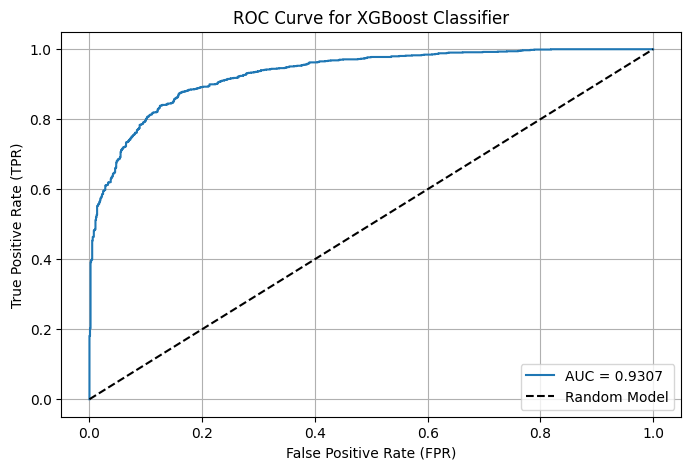

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict the probabilities
y_proba = final_xgboost.predict_proba(X_test_b)[:, 1]  # probability for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_b, y_proba)

# Calculate AUC
auc_score = roc_auc_score(y_test_b, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend()
plt.grid(True)
plt.show()


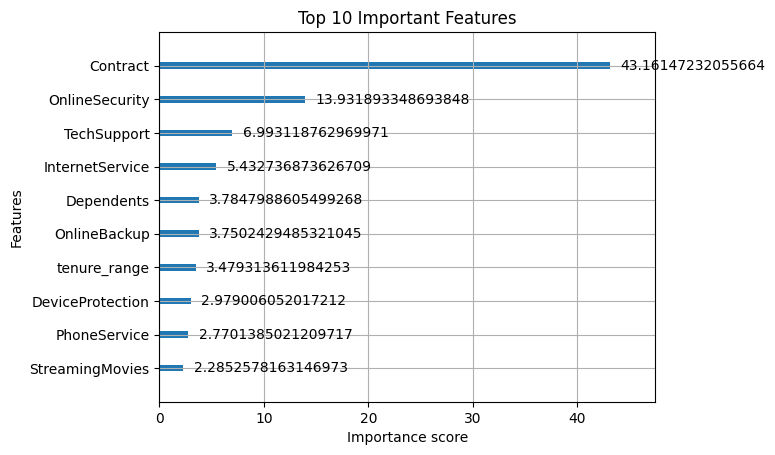

In [108]:
from xgboost import plot_importance

plot_importance(final_xgboost, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()


In [109]:
import joblib
joblib.dump(final_xgboost, 'XGBoost_final.pkl')

['XGBoost_final.pkl']

In [110]:
X = X_ovs[['Contract','OnlineSecurity','TechSupport','InternetService','OnlineBackup','Dependents','tenure_range','DeviceProtection','PhoneService','StreamingMovies']]

## Only select the top 10 features to train the model 

In [132]:
X_ovs.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_range
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
5,0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,0
6,1,0,0,1,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,1
7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,2
9,1,0,0,1,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,5


In [114]:
y_ovs

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int64

In [115]:
X_train_b.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'tenure_range'],
      dtype='object')

In [130]:
df.head(20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [136]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [140]:
df['PaperlessBilling'].head(20)

0     Yes
1      No
2     Yes
3      No
4     Yes
5     Yes
6     Yes
7      No
8     Yes
9      No
10    Yes
11     No
12     No
13    Yes
14    Yes
15     No
16     No
17     No
18     No
19    Yes
Name: PaperlessBilling, dtype: object

In [141]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)